# <center> **Titanic Competition** </center>

**Link Competitions:** [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)

**Vũ Khánh Nam**

***
## Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, log_loss
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')
PassengerID_test = df_test["PassengerId"]

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocessing

In [3]:
label_encoder = preprocessing.LabelEncoder()
scaler = StandardScaler()

Training set

In [4]:
df_train = df_train.drop(columns= ["Name",  "PassengerId"])

df_train["Cabin"] = df_train["Cabin"][:].str[0]
df_train["Cabin"].fillna("O", inplace=True)
df_train["Cabin"] = label_encoder.fit_transform(df_train["Cabin"])

df_train = df_train.replace({"Ticket": {"LINE": "LINE 0" }})
df_train["Ticket_num"] = df_train["Ticket"].str.split(" ").str[-1].astype(int)

df_train["Ticket"] = df_train["Ticket"].str.split(" ").str[0].apply(lambda x: x if x.isnumeric() == False else "None")
df_train["Ticket"] = df_train["Ticket"].str.replace("/", "",regex=True).str.replace(".", "",regex=True)
df_train["Ticket"] = label_encoder.fit_transform(df_train["Ticket"])

df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_num
0,0,3,male,22.0,1,0,1,7.2500,7,S,21171
1,1,1,female,38.0,1,0,11,71.2833,2,C,17599
2,1,3,female,26.0,0,0,27,7.9250,7,S,3101282
3,1,1,female,35.0,1,0,10,53.1000,2,S,113803
4,0,3,male,35.0,0,0,10,8.0500,7,S,373450
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,10,13.0000,7,S,211536
887,1,1,female,19.0,0,0,10,30.0000,1,S,112053
888,0,3,female,NaN,1,2,29,23.4500,7,S,6607
889,1,1,male,26.0,0,0,10,30.0000,2,C,111369


Test set

In [5]:
df_test = df_test.drop(columns= ["Name", "PassengerId"])
df_test["Cabin"] = df_test["Cabin"][:].str[0]
df_test["Cabin"].fillna("O", inplace=True)
df_test["Cabin"] = label_encoder.fit_transform(df_test["Cabin"])


df_test = df_test.replace({"Ticket": {"LINE": "LINE 0" }})
df_test["Ticket_num"] = df_test["Ticket"].str.split(" ").str[-1].astype(int)

df_test["Ticket"] = df_test["Ticket"].str.split(" ").str[0].apply(lambda x: x if x.isnumeric() == False else "None")
df_test["Ticket"] = df_test["Ticket"].str.replace("/", "",regex=True).str.replace(".", "",regex=True)
df_test["Ticket"] = label_encoder.fit_transform(df_test["Ticket"])

df_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_num
0,3,male,34.5,0,0,10,7.8292,7,Q,330911
1,3,female,47.0,1,0,10,7.0000,7,S,363272
2,2,male,62.0,0,0,10,9.6875,7,Q,240276
3,3,male,27.0,0,0,10,8.6625,7,S,315154
4,3,female,22.0,1,1,10,12.2875,7,S,3101298
...,...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,2,8.0500,7,S,3236
414,1,female,39.0,0,0,11,108.9000,2,C,17758
415,3,male,38.5,0,0,22,7.2500,7,S,3101262
416,3,male,NaN,0,0,10,8.0500,7,S,359309


### Fillna Train set

In [6]:
df_train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        2
Ticket_num      0
dtype: int64

In [7]:
df_train["Sex"] = label_encoder.fit_transform(df_train["Sex"])

df_train["Age"].fillna(df_train["Age"].mean(), inplace=True)

df_train["Embarked"] = label_encoder.fit_transform(df_train["Embarked"])
df_train["Embarked"].fillna(df_train["Embarked"].mean(), inplace=True)
df_train


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_num
0,0,3,1,22.000000,1,0,1,7.2500,7,2,21171
1,1,1,0,38.000000,1,0,11,71.2833,2,0,17599
2,1,3,0,26.000000,0,0,27,7.9250,7,2,3101282
3,1,1,0,35.000000,1,0,10,53.1000,2,2,113803
4,0,3,1,35.000000,0,0,10,8.0500,7,2,373450
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,10,13.0000,7,2,211536
887,1,1,0,19.000000,0,0,10,30.0000,1,2,112053
888,0,3,0,29.699118,1,2,29,23.4500,7,2,6607
889,1,1,1,26.000000,0,0,10,30.0000,2,0,111369


In [8]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
Ticket_num    0
dtype: int64

In [9]:
df_train[["Ticket_num"]] = scaler.fit_transform(df_train[["Ticket_num",]])
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_num
0,0,3,1,22.000000,1,0,1,7.2500,7,2,-0.420410
1,1,1,0,38.000000,1,0,11,71.2833,2,0,-0.425854
2,1,3,0,26.000000,0,0,27,7.9250,7,2,4.274382
3,1,1,0,35.000000,1,0,10,53.1000,2,2,-0.279217
4,0,3,1,35.000000,0,0,10,8.0500,7,2,0.116544
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,10,13.0000,7,2,-0.130250
887,1,1,0,19.000000,0,0,10,30.0000,1,2,-0.281885
888,0,3,0,29.699118,1,2,29,23.4500,7,2,-0.442609
889,1,1,1,26.000000,0,0,10,30.0000,2,0,-0.282927


### Fillna Test set

In [10]:
df_test.isnull().sum()

Pclass         0
Sex            0
Age           86
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
Ticket_num     0
dtype: int64

In [11]:
df_test["Age"].fillna(df_test["Age"].mean(), inplace=True)
df_test["Fare"].fillna(df_test["Fare"].mean(), inplace=True)

df_test["Sex"] = label_encoder.fit_transform(df_test["Sex"])
df_test["Embarked"] = label_encoder.fit_transform(df_test["Embarked"])

df_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_num
0,3,1,34.50000,0,0,10,7.8292,7,1,330911
1,3,0,47.00000,1,0,10,7.0000,7,2,363272
2,2,1,62.00000,0,0,10,9.6875,7,1,240276
3,3,1,27.00000,0,0,10,8.6625,7,2,315154
4,3,0,22.00000,1,1,10,12.2875,7,2,3101298
...,...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,2,8.0500,7,2,3236
414,1,0,39.00000,0,0,11,108.9000,2,0,17758
415,3,1,38.50000,0,0,22,7.2500,7,2,3101262
416,3,1,30.27259,0,0,10,8.0500,7,2,359309


In [12]:
df_test[["Ticket_num"]] = scaler.fit_transform(df_test[["Ticket_num",]])
df_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_num
0,3,1,34.50000,0,0,10,7.8292,7,1,0.132042
1,3,0,47.00000,1,0,10,7.0000,7,2,0.187173
2,2,1,62.00000,0,0,10,9.6875,7,1,-0.022366
3,3,1,27.00000,0,0,10,8.6625,7,2,0.105198
4,3,0,22.00000,1,1,10,12.2875,7,2,4.851741
...,...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,2,8.0500,7,2,-0.426193
414,1,0,39.00000,0,0,11,108.9000,2,0,-0.401453
415,3,1,38.50000,0,0,22,7.2500,7,2,4.851679
416,3,1,30.27259,0,0,10,8.0500,7,2,0.180422


## Correlation map

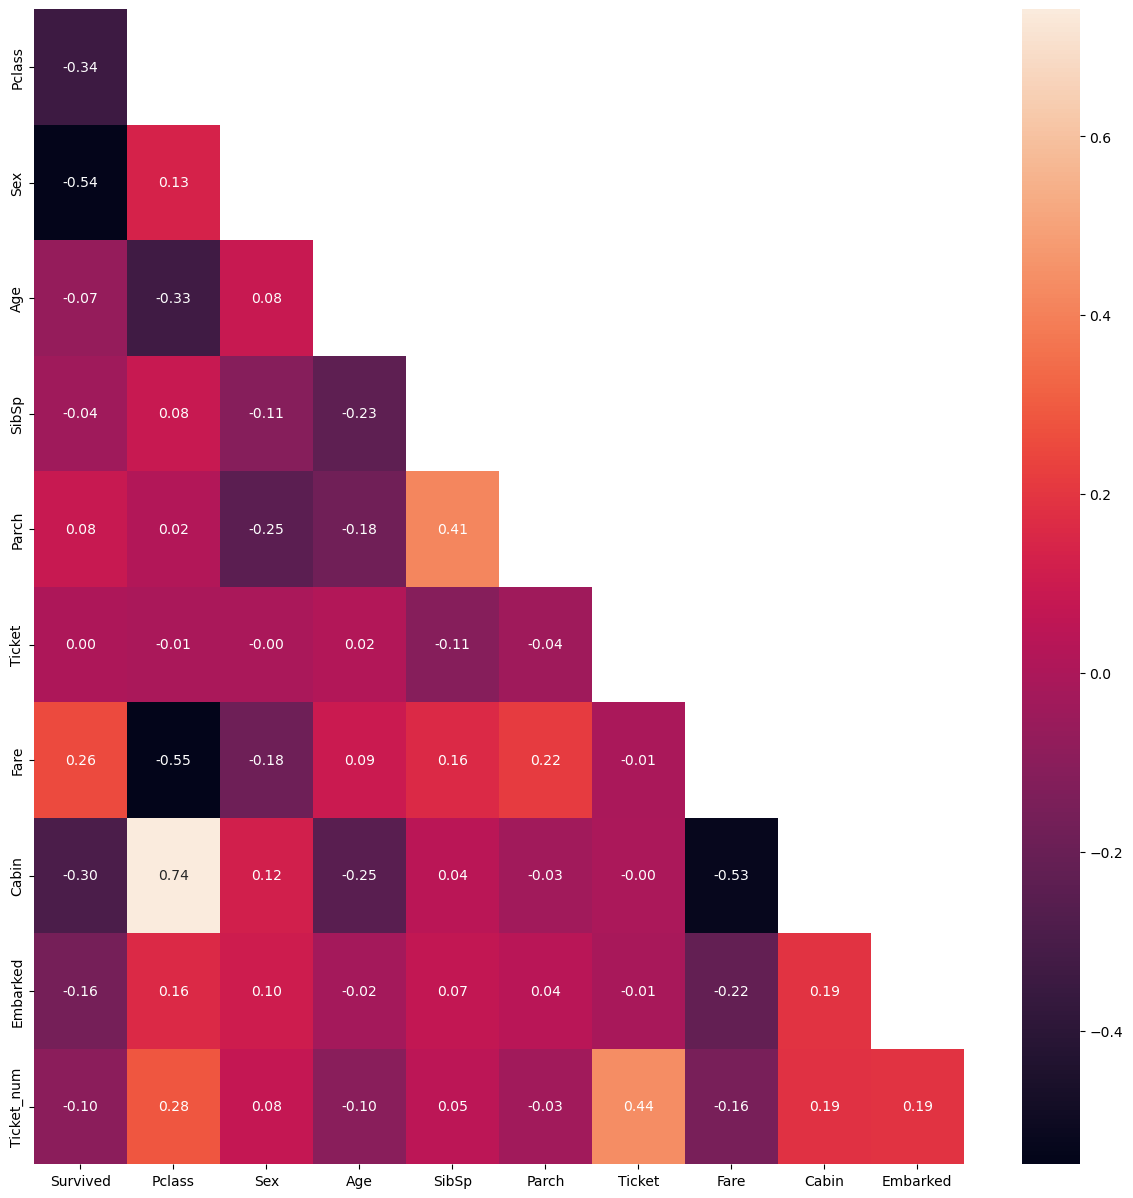

In [13]:
corr = df_train.corr()
one_corr = np.ones_like(corr, dtype=bool)

mask = np.triu(one_corr)
mask = mask[1:, :-1]
corr = corr.iloc[1:, :-1]

plt.figure(figsize=(15, 15))
sns.heatmap(data= corr, mask= mask, annot=True, fmt='.2f')
plt.show()

## Split Train_set, Val_set, Y_label

In [14]:
X = df_train.drop("Survived", axis= 1)
y = df_train["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size= 0.10, random_state= 0)

print("X_train:", X_train.shape, "  y_train:", y_train.shape, "\nX_val:", X_val.shape, "  \ny_val:", y_val.shape)


X_train: (801, 10)   y_train: (801,) 
X_val: (90, 10)   
y_val: (90,)


## Training and Choose the best module

### My NN

In [15]:
model_NN = Sequential(
    [
        layers.Flatten(input_shape = (X_train.shape[1],)),
        Dense(10, activation = "relu", kernel_regularizer=tf.keras.regularizers.l2(0.1), name= "L1"),
        Dense(5, activation = "relu", kernel_regularizer=tf.keras.regularizers.l2(0.1), name = "L2"),
        Dense(1, activation = "linear", kernel_regularizer=tf.keras.regularizers.l2(0.1), name= "L3")
    ], name = "NN"
)
model_NN.summary()

Model: "NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 L1 (Dense)                  (None, 10)                110       
                                                                 
 L2 (Dense)                  (None, 5)                 55        
                                                                 
 L3 (Dense)                  (None, 1)                 6         
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_NN.compile(
    loss= tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy']
)

Training set

In [17]:
history_train = model_NN.fit(X_train,y_train,
          epochs = 500,
          )

Epoch 1/500
26/26 [==============================] - 1s 1ms/step - loss: 50.6440 - accuracy: 0.6692
Epoch 2/500
26/26 [==============================] - 0s 798us/step - loss: 1.4035 - accuracy: 0.6067
Epoch 3/500
26/26 [==============================] - 0s 798us/step - loss: 0.9858 - accuracy: 0.6517
Epoch 4/500
26/26 [==============================] - 0s 798us/step - loss: 0.8253 - accuracy: 0.6404
Epoch 5/500
26/26 [==============================] - 0s 798us/step - loss: 0.7956 - accuracy: 0.6342
Epoch 6/500
26/26 [==============================] - 0s 798us/step - loss: 0.7426 - accuracy: 0.6517
Epoch 7/500
26/26 [==============================] - 0s 798us/step - loss: 0.7022 - accuracy: 0.6517
Epoch 8/500
26/26 [==============================] - 0s 758us/step - loss: 0.6705 - accuracy: 0.6567
Epoch 9/500
26/26 [==============================] - 0s 798us/step - loss: 0.6511 - accuracy: 0.6679
Epoch 10/500
26/26 [==============================] - 0s 758us/step - loss: 0.6585 - accurac

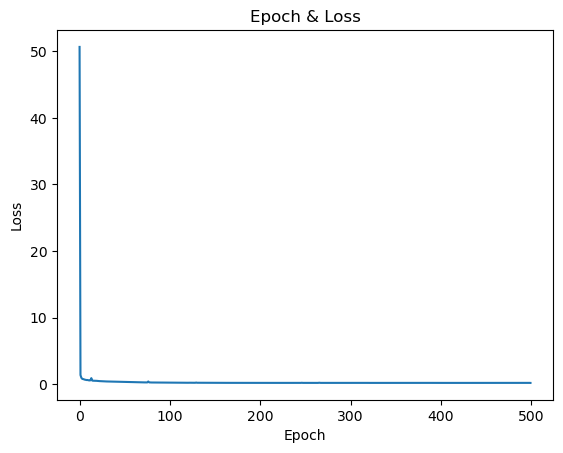

In [18]:
his_train_loss = history_train.history["loss"]
his_train_epoch = history_train.epoch

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch & Loss")

plt.plot(his_train_epoch, his_train_loss)

Val set

In [19]:
y_pred_val_NN = model_NN.predict(X_val)
y_pred_val_NN = (y_pred_val_NN > 0.5)

y_pred_train_NN = model_NN.predict(X_train)
y_pred_train_NN = (y_pred_train_NN > 0.5)

acc_train_NN = accuracy_score(y_train, y_pred_train_NN)
f1_train_NN = f1_score(y_train, y_pred_train_NN)

acc_val_NN = accuracy_score(y_val, y_pred_val_NN)
f1_val_NN = f1_score(y_val, y_pred_val_NN)

print("loss_train:", history_train.history["loss"][-1])
print("accuracy_score_train:", acc_train_NN, "     f1_train:",f1_train_NN)
print("accuracy_score_val:", acc_val_NN, "     f1_val:",f1_val_NN)


26/26 [==============================] - 0s 625us/step
loss_train: 0.22086715698242188
accuracy_score_train: 0.6729088639200999      f1_train: 0.44957983193277307
accuracy_score_val: 0.6444444444444445      f1_val: 0.4838709677419355


In [20]:
mean_f1_NN = (f1_train_NN + f1_val_NN)/2 

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_train_lr = lr.predict(X_train)
y_pred_val_lr = lr.predict(X_val)

acc_train_lr = accuracy_score(y_train, y_pred_train_lr)
f1_train_lr = f1_score(y_train, y_pred_train_lr)

acc_val_lr = accuracy_score(y_val, y_pred_val_lr)
f1_val_lr = f1_score(y_val, y_pred_val_lr)


print("accuracy_score_train:", acc_train_lr, "     f1_train:",f1_train_lr)
print("accuracy_score_val:", acc_val_lr, "     f1_val:",f1_val_lr)

accuracy_score_train: 0.7965043695380774      f1_train: 0.7223168654173765
accuracy_score_val: 0.8111111111111111      f1_val: 0.7792207792207793


In [22]:
mean_f1_Logis = (f1_train_lr + f1_val_lr)/2 

### K-Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(X_train, y_train)

y_pred_train_knn = knn.predict(X_train)
y_pred_val_knn = knn.predict(X_val)

acc_train_knn = accuracy_score(y_train, y_pred_train_knn)
f1_train_knn = f1_score(y_train, y_pred_train_knn)

acc_val_knn = accuracy_score(y_val, y_pred_val_knn)
f1_val_knn = f1_score(y_val, y_pred_val_knn)


print("accuracy_score_train:", acc_train_knn, "     f1_train:",f1_train_knn)
print("accuracy_score_val:", acc_val_knn, "     f1_val:",f1_val_knn)

accuracy_score_train: 0.8064918851435705      f1_train: 0.72663139329806
accuracy_score_val: 0.7111111111111111      f1_val: 0.6486486486486486


In [24]:
mean_f1_KNN = (f1_train_knn + f1_val_knn)/2 

### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred_train_clf = clf.predict(X_train)
y_pred_val_clf = clf.predict(X_val)

acc_train_clf = accuracy_score(y_train, y_pred_train_clf)
f1_train_clf = f1_score(y_train, y_pred_train_clf)

acc_val_clf = accuracy_score(y_val, y_pred_val_clf)
f1_val_clf = f1_score(y_val, y_pred_val_clf)


print("accuracy_score_train:", acc_train_clf, "     f1_train:",f1_train_clf)
print("accuracy_score_val:", acc_val_clf, "     f1_val:",f1_val_clf)


accuracy_score_train: 0.9987515605493134      f1_train: 0.9983525535420099
accuracy_score_val: 0.7888888888888889      f1_val: 0.7323943661971831


In [26]:
mean_f1_DTree = (f1_train_clf + f1_val_clf)/2 

### Bagging Decision Tree 

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
 
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, y_train)

y_pred_train_bg = bg.predict(X_train)
y_pred_val_bg = bg.predict(X_val)

acc_train_bg = accuracy_score(y_train, y_pred_train_bg)
f1_train_bg = f1_score(y_train, y_pred_train_bg)

acc_val_bg = accuracy_score(y_val, y_pred_val_bg)
f1_val_bg = f1_score(y_val, y_pred_val_bg)


print("accuracy_score_train:", acc_train_bg, "     f1_train:",f1_train_bg)
print("accuracy_score_val:", acc_val_bg, "     f1_val:",f1_val_bg)

accuracy_score_train: 0.9363295880149812      f1_train: 0.9116117850953206
accuracy_score_val: 0.8111111111111111      f1_val: 0.7536231884057971


In [28]:
mean_f1_BagDTree = (f1_train_bg + f1_val_bg)/2 

### Boosting Decision Tree

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train, y_train)

y_pred_train_adb = adb.predict(X_train)
y_pred_val_adb = adb.predict(X_val)

acc_train_adb = accuracy_score(y_train, y_pred_train_adb)
f1_train_adb = f1_score(y_train, y_pred_train_adb)

acc_val_adb = accuracy_score(y_val, y_pred_val_adb)
f1_val_adb = f1_score(y_val, y_pred_val_adb)


print("accuracy_score_train:", acc_train_adb, "     f1_train:",f1_train_adb)
print("accuracy_score_val:", acc_val_adb, "     f1_val:",f1_val_adb)

accuracy_score_train: 0.9275905118601748      f1_train: 0.8999999999999999
accuracy_score_val: 0.7888888888888889      f1_val: 0.7323943661971831


In [30]:
mean_f1_BoostDTree = (f1_train_adb + f1_val_adb)/2 

### Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 310, max_depth = 24, min_samples_split= 2, random_state= 4)
rf.fit(X_train, y_train)

y_pred_train_rf = rf.predict(X_train)
y_pred_val_rf = rf.predict(X_val)

acc_train_rf = accuracy_score(y_train, y_pred_train_rf)
f1_train_rf = f1_score(y_train, y_pred_train_rf)

acc_val_rf = accuracy_score(y_val, y_pred_val_rf)
f1_val_rf = f1_score(y_val, y_pred_val_rf)

print("accuracy_score_train:", acc_train_rf, "     f1_train:",f1_train_rf)
print("accuracy_score_val:", acc_val_rf, "     f1_val:",f1_val_rf)



N: 580   D: 27   Sp: 9   St: 18
accuracy_score_train: 0.9987515605493134      f1_train: 0.9983525535420099
accuracy_score_val: 0.8555555555555555      f1_val: 0.8115942028985509


In [120]:
mean_f1_RandForest = (f1_train_rf + f1_val_rf)/2 
mean_f1_RandForest

0.9049733782202805

### XGBoost

In [33]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train,y_train)
 
y_pred_train_xgb = xgb.predict(X_train)
y_pred_val_xgb = xgb.predict(X_val)

acc_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
f1_train_xgb = f1_score(y_train, y_pred_train_xgb)

acc_val_xgb = accuracy_score(y_val, y_pred_val_xgb)
f1_val_xgb = f1_score(y_val, y_pred_val_xgb)


print("accuracy_score_train:", acc_train_xgb, "     f1_train:",f1_train_xgb)
print("accuracy_score_val:", acc_val_xgb, "     f1_val:",f1_val_xgb)

accuracy_score_train: 0.9962546816479401      f1_train: 0.9950413223140495
accuracy_score_val: 0.8333333333333334      f1_val: 0.7945205479452054


In [34]:
mean_f1_XGBoost = (f1_train_xgb + f1_val_xgb)/2 

### Choose the best module

In [121]:
mean_module = [model_NN, lr, knn, clf, bg, adb, rf, xgb]

mean_name = ["My module NN", "Logistic Regression", "K-Nearest Neighbors", "Decision Tree",
              "Bagging Decision Tree", "Boosting Decision Tree", "Random Forest", "XGBoost"]

mean_f1 = [mean_f1_NN, mean_f1_Logis, mean_f1_KNN, mean_f1_DTree, mean_f1_BagDTree,
            mean_f1_BoostDTree, mean_f1_RandForest, mean_f1_XGBoost]

f1_train_all = [f1_train_NN, f1_train_lr, f1_train_knn, f1_train_clf,
                 f1_train_bg, f1_train_adb, f1_train_rf, f1_train_xgb]

f1_val_all = [f1_val_NN, f1_val_lr, f1_val_knn, f1_val_clf,
                 f1_val_bg, f1_val_adb, f1_val_rf, f1_val_xgb]

acc_train_all = [acc_train_NN, acc_train_lr, acc_train_knn, acc_train_clf,
                 acc_train_bg, acc_train_adb, acc_train_rf, acc_train_xgb]

acc_val_all = [acc_val_NN, acc_val_lr, acc_val_knn, acc_val_clf,
                 acc_val_bg, acc_val_adb, acc_val_rf, acc_val_xgb]

mean_df = pd.DataFrame({"Module":mean_name,
                        "Mean F1": mean_f1,
                        "F1 Train": f1_train_all,
                        "F1 Val": f1_val_all,
                        "Accuracy Train": acc_train_all,
                        "Accuracy Val": acc_val_all
                        })

mean_df = mean_df.sort_values('Mean F1', ascending= False)
mean_df


,Module,Mean F1,F1 Train,F1 Val,Accuracy Train,Accuracy Val
6,Random Forest,0.904973,0.998353,0.811594,0.998752,0.855556
7,XGBoost,0.894781,0.995041,0.794521,0.996255,0.833333
3,Decision Tree,0.865373,0.998353,0.732394,0.998752,0.788889
4,Bagging Decision Tree,0.832617,0.911612,0.753623,0.936330,0.811111
5,Boosting Decision Tree,0.816197,0.900000,0.732394,0.927591,0.788889
1,Logistic Regression,0.750769,0.722317,0.779221,0.796504,0.811111
2,K-Nearest Neighbors,0.687640,0.726631,0.648649,0.806492,0.711111
0,My module NN,0.466725,0.449580,0.483871,0.672909,0.644444


## Predict

In [122]:
index = mean_df.index[0]
name = mean_name[index]
best_module = mean_module[index]
print("Best module:", name)

y_pred_test_best = best_module.predict(df_test)

output = pd.DataFrame({'PassengerId': PassengerID_test, 'Survived': y_pred_test_best})
output.to_csv('submission.csv', index=False)
output

Best module: Random Forest


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
